In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
sb.set()
linreg = LinearRegression()
dectree = DecisionTreeClassifier(max_depth = 4)
rforest = RandomForestClassifier(n_estimators = 150, max_depth = 4)

from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as urlop
from selenium import webdriver
import requests
import re

In [2]:
def basicexp(df):
    print('Dataframe info:')
    df.info()
    print()
    print('Data dims: ', df.shape)
    print()
    numDF = pd.DataFrame(df.select_dtypes(exclude=['object']))
    print(numDF.describe())
    print()
    print(numDF.corr())
    print()
    sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    size = len(numDF.columns)
    f, axes = plt.subplots(size, 3, figsize = (24,16))
    count = 0
    for var in numDF:
        sb.boxplot(numDF[var], orient = "h", ax = axes[count, 0])
        sb.distplot(numDF[var], ax = axes[count,1])
        sb.violinplot(numDF[var], ax = axes[count,2])
        count += 1
    
def traintest(predictor, result, df, sample):
    predictor = pd.DataFrame(df[predictor])
    result = pd.DataFrame(df[result])
    X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size = sample)
    print("Train Set :", y_train.shape, X_train.shape)
    print("Test Set  :", y_test.shape, X_test.shape)
    return [X_train, X_test, y_train, y_test]

def measure(x, y, y_pred):
    print("Classification Accuracy \t:", dectree.score(x, y))
    cm = confusion_matrix(y , y_pred)
    print('True negative = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True positive = ', cm[1][1])
    
def score(model, traintest):
    X_train, X_test, y_train, y_test = traintest
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Accuracy/Explained variance \t:", model.score(X_train, y_train))
    print()
    
    print("Goodness of Fit of Model \tTest Dataset")
    print("Accuracy/Explained variance \t:", model.score(X_test, y_test))
    print()

def ranforfit (traintest):
    X_train, X_test, y_train, y_test = traintest
    rforest.fit(X_train, y_train)
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    measure(X_train, y_train, y_train_pred)
    measure(X_test, y_test, y_test_pred)
    
    score(rforest, traintest)

    f, axes = plt.subplots(2, 1, figsize=(12, 12))
    
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
def dtcfit(traintest):
    X_train, X_test, y_train, y_test = traintest
    dectree.fit(X_train, y_train)
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    measure(X_train, y_train, y_train_pred)
    measure(X_test, y_test, y_test_pred)
    
    score(dectree, traintest)
    
    f, axes = plt.subplots(2,1,figsize = (12,12))
    
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    treedot = export_graphviz(dectree,
                          feature_names = X_train.columns,
                          out_file = None,
                          filled = True,
                          rounded = True,
                          special_characters = True)
    return graphviz.Source(treedot)

def lrfit(traintest):
    X_train, X_test, y_train, y_test = traintest
    linreg.fit(X_train, y_train)
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    score(linreg, traintest)

In [ ]:
car_price = []
car_dep = []
vehicle_brand =[]
car_eng_list = []
car_mil = []
car_reg_list =[]
car_type_list =[]


for i in range(0,250,2):
    url2 = "https://www.sgcarmart.com/used_cars/listing.php?BRSR={}0&RPG=20".format(i)
    resp = requests.get(url2)
    sg_car_mart = bs(resp.text, 'html.parser')
    resp.close()
    
    car_d = sg_car_mart.find_all('div', attrs ={'style' : "width:101px;"} )
    for values in range(len(car_d)):
        num = [str(i) for i in car_d[values].text.strip() if i.isdigit()]
        try:
            car_dep.append(int("".join(num)))
        except:
            car_dep.append('NA')

    car_p = sg_car_mart.find_all('div', attrs ={'style':"width:67px; font-weight:bold;"} )
    for values in range(len(car_p)):
        num = [str(i) for i in car_p[values].text.strip() if i.isdigit()] 
        try:
            car_price.append(int("".join(num)))
        except:
            car_price.append('NA')

    car_make = sg_car_mart.find_all('div', attrs ={'style':"width:186px;padding-left:4px;"} )
    for values in range(len(car_make)):
        vehicle_brand.append(car_make[values].find_next('a').text)

    car_eng = sg_car_mart.find_all('div', attrs = {"style" : "width:84px;"})
    for values in range(len(car_d)):
        car_eng_values = (car_eng[values].text.strip())
        num1 = [str(i) for i in car_eng_values if i.isdigit()]
        try:
            car_eng_list.append(int("".join(num1)))
        except:
            car_eng_list.append('NA')

    car_mil_search = sg_car_mart.find_all('div', attrs = {"style" : "width:83px;"})
    for values in range(len(car_mil_search)):
        car_mil_values = car_mil_search[values].text.strip()
        num1 = [str(i) for i in car_mil_values if i.isdigit()]
        try:
            car_mil.append(int("".join(num1)))
        except:
            car_mil.append('NA')


    car_reg = sg_car_mart.find_all('div', attrs = {"style" : "width:89px;"})
    for i in range(0,38,2):
        car_reg_list.append(car_reg[i].text.strip())
    for n in range(1,38,2):
        car_type_list.append(car_reg[n].text.strip().replace('-', 'NA'))


In [ ]:
filename = 'sg_car_mart.csv'
headers = 'Brand,Price,Dep,Mil,Eng,Reg,Type\n'

def combined():
    var = 0
    while True:
        try:
            f.write(vehicle_brand[var]+','+str(car_price[var])+','+str(car_dep[var])+','+str(car_mil[var])+','+
                        str(car_eng_list[var])+','+str(car_reg_list[var])+','+ str(car_type_list[var])+'\n')
            var+=1
        except:
            break

f = open(filename, 'w')

f.write(headers)


combined()


f.close()



df = pd.read_csv('sg_car_mart.csv')
df

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 2374
Data columns (total 7 columns):
Brand     1704 non-null object
 Price    1704 non-null float64
 Dep      1704 non-null float64
 Mil      1704 non-null float64
 Eng      1704 non-null int64
 Reg      1704 non-null object
 Type     1704 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 106.5+ KB

Data dims:  (1704, 7)

               Price            Dep            Mil           Eng
count    1704.000000    1704.000000    1704.000000   1704.000000
mean    86341.491197   12335.786385   73710.129108   1961.059272
std     73517.121147   15527.488457   47526.424882    784.144102
min      7388.000000    3680.000000       1.000000    658.000000
25%     52800.000000    7807.500000   37976.250000   1498.000000
50%     68800.000000    9595.000000   68000.000000   1699.000000
75%     97800.000000   13530.000000  108000.000000   1998.000000
max    985000.000000  464320.000000  300000.000000 

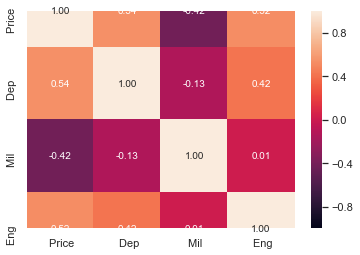

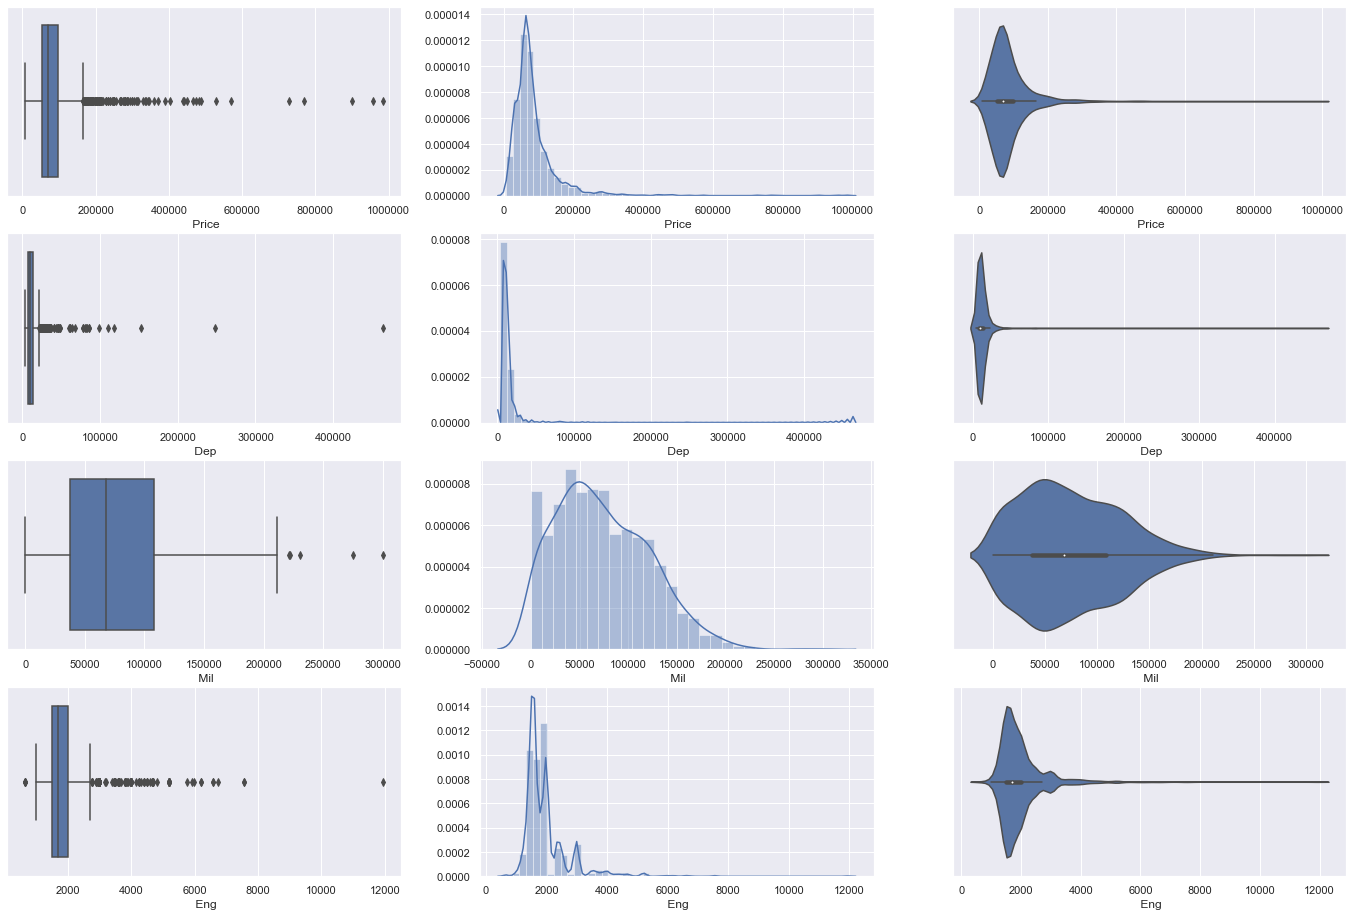

In [7]:
basicexp(df)

In [14]:
df['Price']

0        22888.0
1        20800.0
2        37800.0
3        15800.0
4        45888.0
          ...   
2370     64800.0
2371    150800.0
2372     16800.0
2373     69800.0
2374     95800.0
Name: Price, Length: 2375, dtype: float64